### Name:Saloni Sharad Bhalerao

### SJSU Id: 012466623

### Project: Alternus Vera

### Individual Contribution: 

### Complex Feature - Credibility

### Non-complex Feature - Fact Checks

### Problem Statement:
There is huge amount of information being generated and propogated on the internet. Unreliable sources of information expose people to a dose of fake news, hoaxes, rumors, conspiracy theories and misleading news. “Fake news” has acquired a certain legitimacy after being named word of the year by Collins, following what the dictionary called its “ubiquitous presence” over the last 12 months

### Research:

Following are the datasets we explored as part of this project

- Kaggles fake news dataset for Fake news
- NYT API and The Guardian Post API to get real news
- LIAR dataset: https://www.cs.ucsb.edu/william/data/liar_dataset.zip
- BS Detector: https://github.com/bs-detector/bs-detector
- CredBank: compsocial.github.io/CREDBANK-data
- Buzzfeed News: https://github.com/BuzzFeedNews/everything
- Corpus of News on the Web (NOW): https://corpus.byu.edu/now/
- Google trends: https://trends.google.com/trends/
- Click Bait(y) dataset from Kaggle: The Examiner - SpamClickBait News Dataset: https://www.kaggle.com/therohk/examine-the-examiner
- Click Bait Challenge: https://www.clickbait-challenge.org/#data

### Classification of Websites / Links / Text:

- Fake News: Sources that fabricate stories out of whole cloth with the intent of pranking the public.
- Satire: Sources that provide humorous commentary on current events in the form of fake news.
- Extreme Bias: Sources that traffic in political propaganda and gross distortions of fact.
- Conspiracy Theory: Sources that are well-known promoters of kooky conspiracy theories.
- Rumor Mill: Sources that traffic in rumors, innuendo, and unverified claims.
- State News: Sources in repressive states operating under government sanction.
- Junk Science: Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims.
- Hate Group: Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination.
- Clickbait: Sources that are aimed at generating online advertising revenue and rely on sensationalist headlines or eye-catching pictures.
- Proceed With Caution: Sources that may be reliable but whose contents require further verification.

#### Reference : http://bsdetector.tech/

### Below features which I found would be good to categorise whether the article/news is fake or not

- Political Affiliation
- Fact Checks
- Social Media
- Context
- Rumour Analysis
- Bias
- Content
- Marketing
- Domain Ranking
- Malicious accounts
- Authenticity
- Spam detection
- Credibility
- Stance detection
- Click-Bait

### Features for the Alternus Vera  and importance as determined from the reading and documents
1.	Political affiliation   - Kaggle /Liar -Liar + NYT + Guardian - 26%
2.	Social Media (yellow press + internet) - https://github.com/KaiDMML/FakeNewsNet + Kaggel dataset - 7%
3.  Bias -  https://github.com/clips/news-audit - 25%
4.	Hate News - 8%
5.  Credibility - 24%
6.  Fact checks  https://github.com/sumeetkr/AwesomeFakeNews + dataset in the git link - 10%

### Below is the work flow I followed as part of the implementation
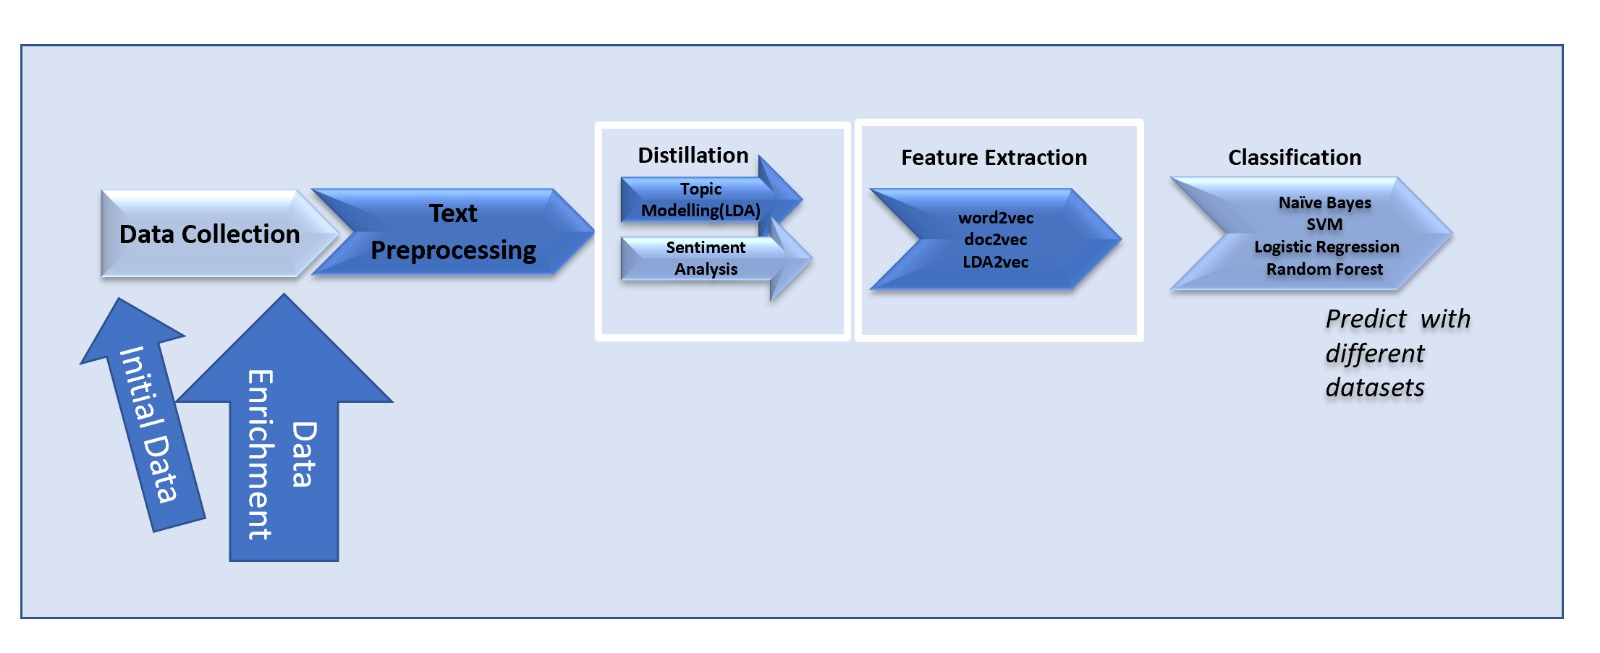

### As specified in the above model I will be following below processes as part of the Distillation:

#### Data Preprocessing

#### LDA and Topic Modeling

#### Sentiment Analysis

#### Doc2Vec

#### Word2Vec

#### Polynomial Equation

### Dataset
LIAR Dataset - for political affiliation
William Yang Wang introduced a daataset called LIAR. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.

### Reference

https://www.researchgate.net/publication/316643096_Liar_Liar_Pants_on_Fire_A_New_Benchmark_Dataset_for_Fake_News_Detection

## Complex Feature - Credibility

### Importing the libraries

In [1]:
# Read data into a dataframe
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
dfs_train = pd.read_excel('C:/Users/salon/input data/complex/train.xlsx')
dfs = dfs_train
dfs.head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


### Dimensions of the data

In [2]:
print("Number of Rows and Columns::", dfs_train.shape)
print(dfs_train.loc[0])

Number of Rows and Columns:: (10269, 14)
ID                                                              2635.json
label                                                               False
statement               Says the Annies List political group supports ...
subject(s)                                                       abortion
speaker                                                      dwayne-bohac
speaker's job title                                  State representative
state info                                                          Texas
party affiliation                                              republican
barely true counts                                                      0
false counts                                                            1
half true counts                                                        0
mostly true counts                                                      0
pants on fire counts                                                   

### Retrieving label and context columns into X_train and Y_train respectively

In [3]:
X_train=dfs_train["context"]
Y_train=dfs_train["label"]

### Checking the count of context with respect to label

In [4]:
CT = pd.crosstab(dfs_train['context'],dfs_train['label'],margins=True)
CT.head()

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
CNN's 'The Situation Room',1,0,0,0,0,0,1
CNN's State of the Union with John King,0,0,0,0,1,0,1
This Week with George Stephanopoulos,0,0,0,1,0,0,1
Washington Report newsletter to constituents.,1,0,0,0,0,0,1
a Webcast,1,0,0,0,0,0,1


### Sorting the values in the descending order with respect to count

In [5]:
CT.sort_values('All', ascending=False)

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
All,1974,1662,1642,2106,1948,831,10163
a news release,44,44,45,46,41,22,242
an interview,58,34,30,47,47,13,229
a press release,41,44,34,46,45,13,223
a speech,34,44,25,55,50,8,216
a TV ad,27,19,39,46,36,13,180
a tweet,28,27,23,23,38,17,156
a campaign ad,19,11,48,31,16,7,132
a television ad,17,8,31,38,19,11,124


### Visualizing the data

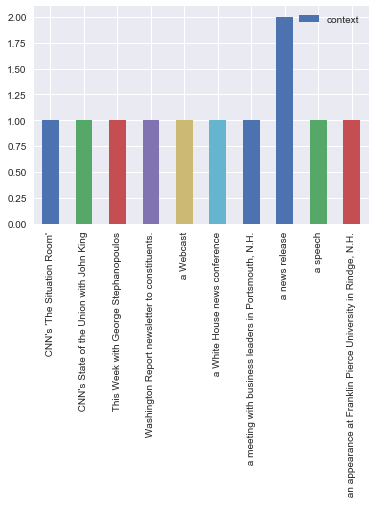

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs['context'].value_counts().sort_index(ascending=True).head(10).plot('bar', ax=ax, legend=True)

### Checking the interview word in context column

In [7]:
import numpy as np
mask = np.column_stack([dfs[col].str.contains("interview") for col in ['context']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dictionary = dict(zip(unique, counts))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [True]]


### Printing the total false and true values

In [8]:
print(dictionary)

{False: 1482, nan: 1, True: 159}


### Visualize the data for barely true values

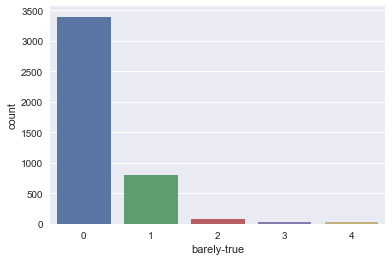

In [9]:
import seaborn as sns
sns.countplot(x="barely-true", data=CT,order=CT["barely-true"].value_counts().iloc[:5].index)
plt.show()

In [10]:
dfs['mask'] = mask
mask

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [True]], dtype=object)

### Retrieving the dataset

In [11]:
dfs.head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,mask
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,False
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,False
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,False
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True


### After visualizing the data for the label column it looks unbalanced

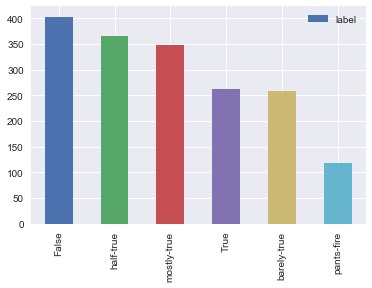

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['mask']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

### Checking the tweet word in context column

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


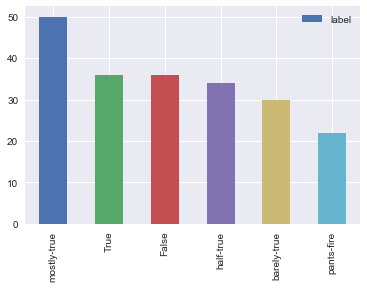

In [13]:
import numpy as np
twitter = np.column_stack([dfs[col].str.contains("tweet") for col in ['context']])
print (twitter)
unique, counts = np.unique(twitter, return_counts=True)
dict(zip(unique, counts))
dfs['twitter'] = twitter
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['twitter']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

### Checking the debate word in context column

[[False]
 [False]
 [False]
 ...
 [True]
 [True]
 [False]]


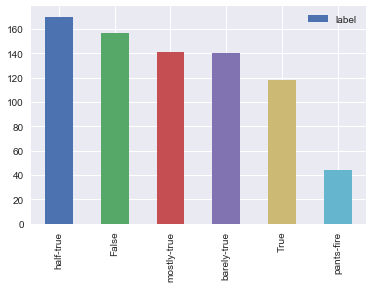

In [14]:
import numpy as np
debate = np.column_stack([dfs[col].str.contains("debate") for col in ['context']])
print (debate)
unique, counts = np.unique(debate, return_counts=True)
dict(zip(unique, counts))
dfs['debate'] = debate
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['debate']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

### Checking the representative word is present or not in Speaker\'s job title column

[[True]
 [False]
 [False]
 ...
 [nan]
 [nan]
 [False]]
{False: 21, nan: 1, True: 1}


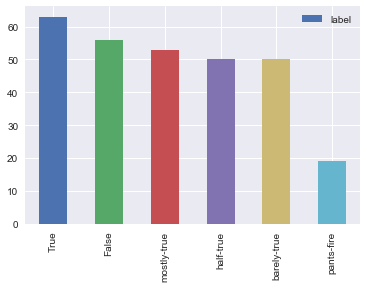

In [15]:
import numpy as np
representative = np.column_stack([dfs[col].str.contains("representative") for col in ['speaker\'s job title']])
print (representative)
unique, counts = np.unique(representative, return_counts=True)
dictionary_representative = dict(zip(unique, counts))
print(dictionary_representative)
dfs['representative'] = representative
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['representative']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

### Checking the President word is present or not in Speaker's job title column

[[False]
 [False]
 [True]
 ...
 [nan]
 [nan]
 [False]]
{False: 9, nan: 1, True: 3}


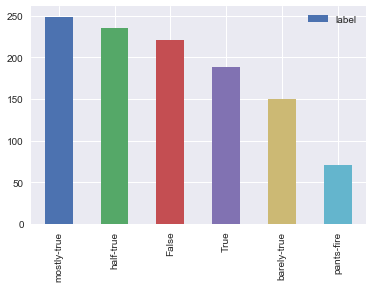

In [16]:
president = np.column_stack([dfs[col].str.contains("President") for col in ['speaker\'s job title']])
print (president)
unique, counts = np.unique(president, return_counts=True)
dictionary_president = dict(zip(unique, counts))
print(dictionary_president)
dfs['president'] = president
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['president']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

## Latent Dirchilet Allocation - (LDA)

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

Below we have applied LDA to a set of documents and split them into topics.

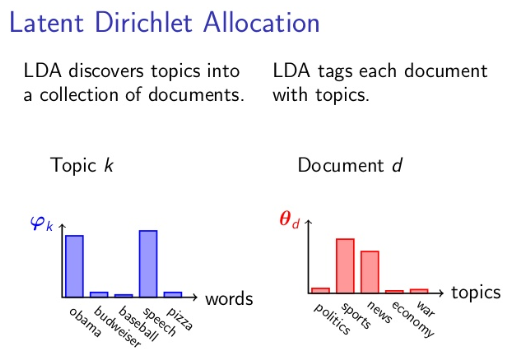

### Importing the libraries

In [17]:
import pandas as pd
data = pd.read_excel('C:/Users/salon/input data/complex/train.xlsx', error_bad_lines=False);
data_text = data[['statement']]
data_text['index'] = data_text.index
documents = data_text

C:\ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Finding the number of documents

In [18]:
len(documents)

10269

### Visualizing the first five documents

In [19]:
documents[:5]

,statement,index
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",2
3,Health care reform legislation is likely to ma...,3
4,The economic turnaround started at the end of ...,4


### Data Pre-processing

We will perform the following steps:

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

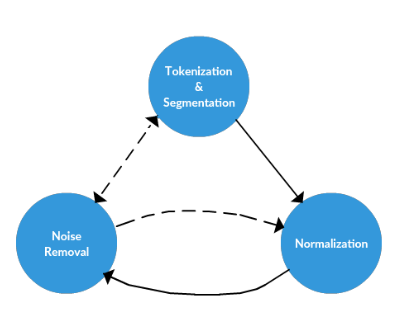

### Loading gensim and nltk libraries

In [20]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

C:\ML\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Lemmatize Example

In [22]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


#### Stemmer Example

In [23]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


The major difference between Stemming and Lemmatizing is, stemming can often create non-existent words, whereas lemmas are actual words.

### Write a function to perform lemmatize and stem preprocessing steps on the data set.

In [24]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

### Select a document to preview after preprocessing

In [25]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'state', 'Sen.', 'Morgan', 'Carrolls', 'votes', 'made', 'it', 'easier', 'to', 'sue', 'doctors,', 'small', 'businesses,', 'even', 'nurses.', 'Putting', 'her', 'own', 'shady', 'interests', 'first.']


 tokenized and lemmatized document: 
['say', 'state', 'morgan', 'carrol', 'vote', 'easier', 'doctor', 'small', 'busi', 'nurs', 'put', 'shadi', 'interest']


### Preprocess the statment text, saving the results as ‘processed_docs’

In [26]:
processed_docs = documents['statement'].map(preprocess)

In [27]:
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: statement, dtype: object

### Bag of words on the dataset

In [28]:
dictionary = gensim.corpora.Dictionary(processed_docs)

#### Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [29]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


### Gensim filter_extremes

Filter out tokens that appear in

- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 100000 most frequent tokens.

In [30]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

### Gensim doc2bow

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(5, 1),
 (24, 1),
 (117, 1),
 (152, 1),
 (352, 1),
 (535, 1),
 (708, 1),
 (906, 1),
 (1065, 1)]

### Preview Bag Of Words for our sample preprocessed document.

In [32]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 5 ("say") appears 1 time.
Word 24 ("vote") appears 1 time.
Word 117 ("state") appears 1 time.
Word 152 ("busi") appears 1 time.
Word 352 ("nurs") appears 1 time.
Word 535 ("small") appears 1 time.
Word 708 ("doctor") appears 1 time.
Word 906 ("put") appears 1 time.
Word 1065 ("interest") appears 1 time.


In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [34]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

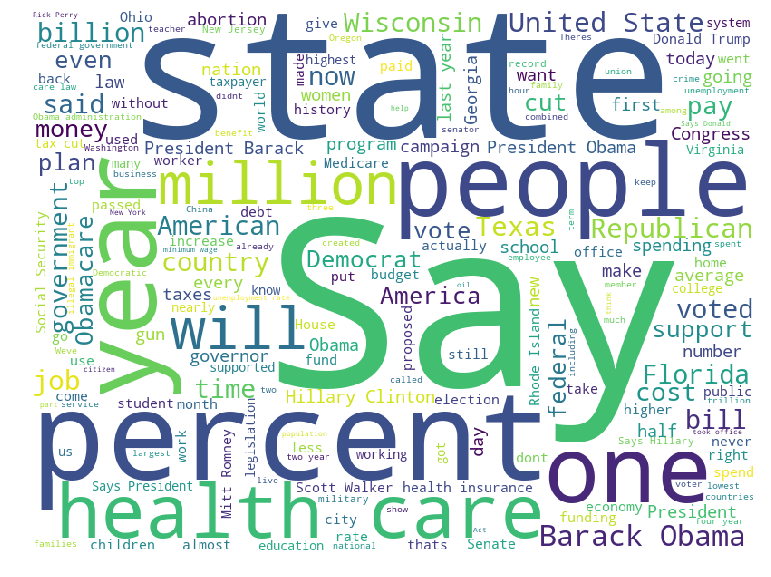

In [35]:
cloud(' '.join(data['statement']))

### TF-IDF

In [36]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [37]:
corpus_tfidf = tfidf[bow_corpus]

In [38]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3399028377044521),
 (1, 0.49960086945501425),
 (2, 0.40963633375026987),
 (3, 0.46333565607020666),
 (4, 0.40830190020991924),
 (5, 0.10872586224577774),
 (6, 0.27175617970851096)]


### Running LDA using Bag of Words

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [39]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

#### For each topic, we will explore the words occuring in that topic and its relative weight.

In [40]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"
Topic: 1 
Words: 0.036*"year" + 0.034*"state" + 0.033*"health" + 0.024*"care" + 0.017*"percent" + 0.014*"budget" + 0.013*"say" + 0.012*"billion" + 0.012*"wisconsin" + 0.012*"countri"
Topic: 2 
Words: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"
Topic: 3 
Words: 0.041*"percent" + 0.035*"job" + 0.023*"say" + 0.023*"american" + 0.022*"govern" + 0.019*"feder" + 0.016*"lose" + 0.015*"creat" + 0.011*"incom" + 0.010*"state"
Topic: 4 
Words: 0.053*"say" + 0.022*"clinton" + 0.017*"hillari" + 0.017*"school" + 0.015*"state" + 0.014*"tax" + 0.013*"public" + 0.013*"obama" + 0.012*"want" + 0.011*"presid"
Topic: 5 
Words: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"

### Topics Identified

- Vote percentage from Texas state in amercian elections
- Expenditure by state on health care every year
- Republican and Democrats elections vote percentage
- Unemployment rate and american businesses
- Elections - Vote percentage for Hillary Clinton
- Health care expenditure
- President Obama and american healthcare
- Illegal immigrants
- Expenditure by state on schools
- Obama's plans presented to Republicans

### Running LDA using TF-IDF

In [41]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [42]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"say" + 0.014*"clinton" + 0.013*"hillari" + 0.010*"plan" + 0.009*"american" + 0.008*"percent" + 0.008*"republican" + 0.007*"million" + 0.007*"rais" + 0.007*"immigr"
Topic: 1 Word: 0.014*"govern" + 0.010*"say" + 0.010*"state" + 0.008*"year" + 0.007*"presid" + 0.007*"obama" + 0.007*"billion" + 0.007*"senat" + 0.007*"spend" + 0.007*"budget"
Topic: 2 Word: 0.015*"say" + 0.014*"obama" + 0.012*"state" + 0.012*"presid" + 0.011*"year" + 0.011*"job" + 0.011*"barack" + 0.010*"percent" + 0.008*"cost" + 0.008*"romney"
Topic: 3 Word: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.008*"vote" + 0.008*"abort" + 0.008*"state" + 0.008*"year" + 0.008*"cut" + 0.007*"bush" + 0.007*"presid"
Topic: 4 Word: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.014*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"percent" + 0.010*"vote" + 0.010*"state" + 0.007*"feder"
Topic: 5 Word: 0.012*"say" + 0.012*"year" + 0.011*"tax" + 0.011*"million" + 0.010*"rais" + 0.008*"percent" + 0.008*"peopl" + 0.0

### Classification of the topics

### Performance evaluation by classifying sample document using LDA Bag of Words model

We will check where our test document would be classified.

In [43]:
processed_docs[4310]

['say',
 'state',
 'morgan',
 'carrol',
 'vote',
 'easier',
 'doctor',
 'small',
 'busi',
 'nurs',
 'put',
 'shadi',
 'interest']

In [44]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6075707077980042	 
Topic: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"plan" + 0.014*"work" + 0.013*"million" + 0.013*"percent" + 0.011*"busi"

Score: 0.31241095066070557	 
Topic: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"

Score: 0.010003095492720604	 
Topic: 0.059*"say" + 0.045*"obama" + 0.031*"presid" + 0.027*"barack" + 0.018*"vote" + 0.017*"percent" + 0.010*"go" + 0.010*"democrat" + 0.009*"citi" + 0.009*"republican"

Score: 0.01000268291682005	 
Topic: 0.044*"say" + 0.017*"immigr" + 0.016*"vote" + 0.016*"percent" + 0.013*"peopl" + 0.013*"illeg" + 0.012*"tax" + 0.011*"million" + 0.011*"year" + 0.009*"take"

Score: 0.010002577677369118	 
Topic: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"

Score: 0.

#### Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### Performance evaluation by classifying sample document using LDA TF-IDF model

In [45]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5771771669387817	 
Topic: 0.012*"year" + 0.011*"say" + 0.008*"state" + 0.008*"percent" + 0.008*"obama" + 0.007*"go" + 0.007*"million" + 0.007*"children" + 0.006*"vote" + 0.006*"dollar"

Score: 0.3428043723106384	 
Topic: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.014*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"percent" + 0.010*"vote" + 0.010*"state" + 0.007*"feder"

Score: 0.010003107599914074	 
Topic: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.008*"vote" + 0.008*"abort" + 0.008*"state" + 0.008*"year" + 0.008*"cut" + 0.007*"bush" + 0.007*"presid"

Score: 0.010003035888075829	 
Topic: 0.015*"state" + 0.012*"percent" + 0.011*"tax" + 0.011*"say" + 0.008*"countri" + 0.008*"vote" + 0.008*"rais" + 0.008*"job" + 0.008*"year" + 0.007*"citi"

Score: 0.010002752766013145	 
Topic: 0.015*"say" + 0.014*"obama" + 0.012*"state" + 0.012*"presid" + 0.011*"year" + 0.011*"job" + 0.011*"barack" + 0.010*"percent" + 0.008*"cost" + 0.008*"romney"

Score: 0.010002396069467068	 
Topic:

#### Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### Testing model on unseen document

In [46]:
unseen_document = 'Fake news is getting weaponized and it has proven effective.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.47284767031669617	 Topic: 0.059*"say" + 0.045*"obama" + 0.031*"presid" + 0.027*"barack" + 0.018*"vote"
Score: 0.3937903940677643	 Topic: 0.041*"percent" + 0.035*"job" + 0.023*"say" + 0.023*"american" + 0.022*"govern"
Score: 0.016672808676958084	 Topic: 0.044*"say" + 0.017*"immigr" + 0.016*"vote" + 0.016*"percent" + 0.013*"peopl"
Score: 0.016671327874064445	 Topic: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote"
Score: 0.016670433804392815	 Topic: 0.053*"say" + 0.022*"clinton" + 0.017*"hillari" + 0.017*"school" + 0.015*"state"
Score: 0.016669990494847298	 Topic: 0.036*"year" + 0.034*"state" + 0.033*"health" + 0.024*"care" + 0.017*"percent"
Score: 0.016669657081365585	 Topic: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year"
Score: 0.016669485718011856	 Topic: 0.049*"say" + 0.036*"state" + 0.024*"percent" + 0.016*"year" + 0.016*"unit"
Score: 0.016669338569045067	 Topic: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*

## Sentiment Analysis

Sentiment Analysis is a linguistic analysis technique that identifies opinion in a piece of text.

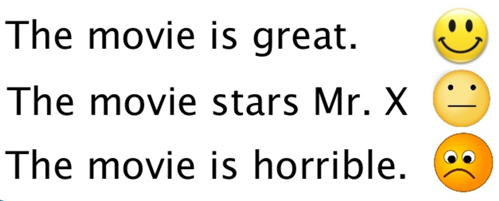

In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [48]:
data = pd.read_excel('C:/Users/salon/input data/complex/train.xlsx')
data.head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10269 entries, 0 to 10268
Data columns (total 14 columns):
ID                      10269 non-null object
label                   10269 non-null object
statement               10269 non-null object
subject(s)              10263 non-null object
speaker                 10263 non-null object
speaker's job title     7363 non-null object
state info              8055 non-null object
party affiliation       10263 non-null object
barely true counts      10263 non-null float64
false counts            10263 non-null float64
half true counts        10263 non-null float64
mostly true counts      10263 non-null float64
pants on fire counts    10263 non-null float64
context                 10163 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [50]:
# Get the how many words each 'speaker' has?
def get_author_rep(speaker):
    counts = {}
    for x in speaker:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [51]:
# Get the name of the 'speaker' with more contributions.
def max_author(speaker):
    maxi = -1
    for k in speaker:
        if(speaker[k] > maxi):
            maxi = speaker[k]
    return k, maxi

#### Speaker with more contributions

In [52]:
count_speaker = get_author_rep(data['speaker'])
speaker, maxi = max_author(count_speaker)
print("'"+ speaker +"' with maximum of "+ str(maxi) + " words.")

'alan-powell' with maximum of 491 words.


#### Positive counts average

In [53]:
positive_count_average = data['mostly true counts'].mean()
print('Positive counts average: ', positive_count_average)

Positive counts average:  16.465166130760988


#### Barely true count average

In [54]:
barely_true_count_average = data['barely true counts'].mean()
print('Barely true counts average: ', barely_true_count_average)

Barely true counts average:  11.54983922829582


#### False counts average

In [55]:
false_count_average = data['false counts'].mean()
print('False counts average: ', barely_true_count_average)

False counts average:  11.54983922829582


AFINN is a list of English words rated for valence with an integer between minus five (negative) and plus five (positive). The words have been manually labeled by Finn Årup Nielsen in 2009-2011. The file is tab-separated.

#### Using the AFIN-111 json 

### The barely true and false counts average is the same.

In [56]:
# Hardcoding the Afinn-111 json
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

In [57]:
score_word_dict = dict(afinn_data)

In [58]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [59]:
scores=[]
for d in data['statement']:
    score = definition_score(d, score_word_dict)
    # print(score)
    scores.append(score)

In [60]:
# We create a new column 'statement_feeling_score' with score of each definition. 
data['statement_feeling_score'] = scores

In [61]:
data_sort_by_feeling = data.sort_values(by=['statement_feeling_score'])

#### Words with the worst sentiment

In [62]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][:15]

,statement,speaker,statement_feeling_score
9433,The attorney general requires that rape victim...,barbara-ann-radnofsky,-12
4015,"In the mid 1990s, in our state, (Florida was) ...",charlie-crist,-12
7380,Chris Koster opposed protecting the women of M...,eric-greitens,-12
9934,"In the 1990s, the Biden Crime Bill added 100,0...",joe-biden,-11
4934,Prince William County has cut violent crime in...,corey-stewart,-10
8263,Says Catherine Cortez Masto failed Nevada rape...,senate-leadership-fund,-10
7657,More lives have been lost because of the war w...,greg-abbott,-10
2932,"Due to the war in Iraq, 4,400 Americans are de...",ron-paul,-9
2363,More lives are lost from violence against wome...,emma-watson,-9
2294,Youre more likely to be the victim of a violen...,van-wanggaard,-9


In [63]:
data_sort_by_feeling.statement.loc[5100]

'Gun violence is by far the leading cause of death for young African American men, outstripping the next nine causes of death combined.'

#### Words with the best sentiment

In [64]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][-15:]

,statement,speaker,statement_feeling_score
3752,"Says the health care law rations care, like sy...",rick-scott,7
1538,"Four balanced budgets in a row, with no new ta...",chris-christie,8
3425,Says Texas Senate hopeful Donna Campbell doesn...,burnt-orange-report,8
6708,"Already, the Affordable Care Act is helping to...",barack-obama,8
1717,Odds of winning the Monopoly Millionaire insta...,georgia-lottery,8
4760,A bag of Cheetos costs less to buy than an app...,mike-tate,8
5907,The RESTORE Act started as an effort to dedica...,marco-rubio,8
2859,"Four balanced budgets in a row, with no new ta...",chris-christie,8
4431,"Under the health care law, everybody will have...",nancy-pelosi,8
1120,"Virginia was named best managed state, best st...",tim-kaine,9


In [65]:
data_sort_by_feeling.statement.loc[2916]

"We've won twice as many states. We've won a greater share of the popular vote."

In [66]:
data['diff_likes'] = data['mostly true counts'] - data['barely true counts']

In [67]:
data.sort_values(['diff_likes'], ascending=True).head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,statement_feeling_score,diff_likes
5983,12658.json,mostly-true,We got the highest vote count in the history o...,"candidates-biography,elections,history,polls",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"a speech in Raleigh, N.C.",0,-26.0
3522,12934.json,barely-true,"NAFTA, signed by Bill Clinton, has been a disa...",trade,donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,an interview with TV station WJAC,-2,-26.0
8302,11088.json,barely-true,"Four times, I said, he (John McCain)is a hero,...","elections,military",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"comments on ABC's ""This Week""",0,-26.0
8278,10955.json,barely-true,When was the last time you saw a Chevrolet in ...,"economy,transportation",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,his presidential announcement speech,0,-26.0
8269,11008.json,False,Public support for abortion is actually going ...,"abortion,polls",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"comments on CNN's ""State of the Union""",2,-26.0


### Pie Chart

In [68]:
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#### Pie about numbers of words with mostly true and barely true

In [69]:
#Boolean column if (up>=down): True
data['positive_words'] = data['mostly true counts'] > data['barely true counts']
data[['label','mostly true counts','barely true counts','context','speaker']].head()

,label,mostly true counts,barely true counts,context,speaker
0,False,0.0,0.0,a mailer,dwayne-bohac
1,half-true,1.0,0.0,a floor speech.,scott-surovell
2,mostly-true,163.0,70.0,Denver,barack-obama
3,False,5.0,7.0,a news release,blog-posting
4,half-true,19.0,15.0,an interview on CNN,charlie-crist


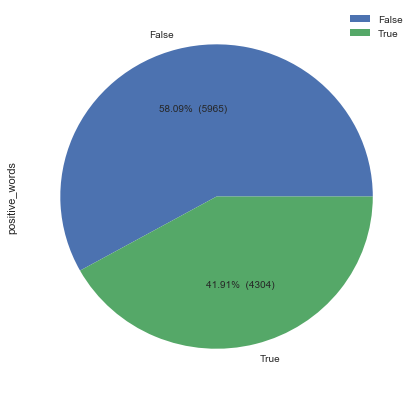

In [70]:
data_positive_likes = data['positive_words'].value_counts()
data_positive_likes.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_likes));

#### Pie about numbers of words with positive feeling in the definition

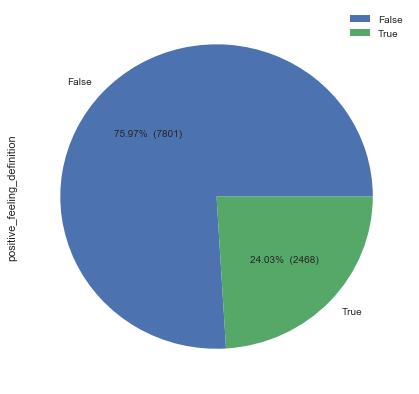

In [71]:
data['positive_feeling_definition'] = data['statement_feeling_score'] > 0
data_positive_feeling_definition = data['positive_feeling_definition'].value_counts()
data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_feeling_definition));

In [72]:
max_definition_feeling = data['statement_feeling_score'].max()
min_definition_feeling = data['statement_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

data['statement_feeling_category'] = pd.cut(data['statement_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

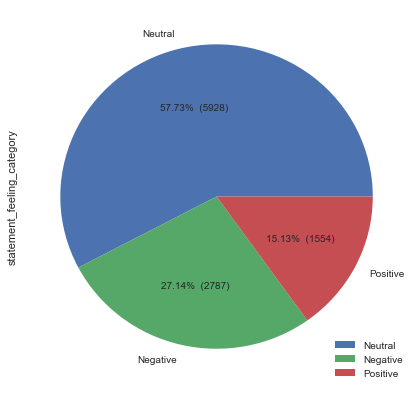

In [73]:
data_definition_feeling_category = data['statement_feeling_category'].value_counts()
data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_definition_feeling_category));

### Doc2Vec

Doc2vec is an adaptation of Word2Vec that allows us to learn document similarity. Doc2vec model by itself is an unsupervised method.

In [74]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_excel('C:/Users/salon/input data/complex/train.xlsx')
df = df[['statement','label']]
df = df[pd.notnull(df['statement'])]
df.rename(columns = {'statement':'narrative'}, inplace = True)
df.rename(columns = {'label':'category'}, inplace = True)
df.head(10)

,narrative,category
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,half-true
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,barely-true
7,I'm the only person on this stage who has work...,half-true
8,"However, it took $19.5 million in Oregon Lotte...",half-true
9,Says GOP primary opponents Glenn Grothman and ...,mostly-true


In [76]:
df.shape

(10269, 2)

In [77]:
df.index = range(10269)

In [78]:
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

183919

In [79]:
df.isnull().sum()

narrative    0
category     0
dtype: int64

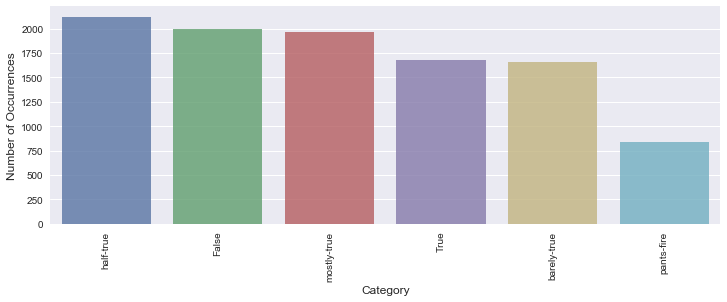

In [80]:
cnt_pro = df['category'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [81]:
def print_narrative(index):
    example = df[df.index == index][['narrative', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])

In [82]:
print_narrative(11)

Since 2000, nearly 12 million Americans have slipped out of the middle class and into poverty.
category: half-true


In [83]:
print_narrative(12)

When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.
category: False


### Text preprocessing

Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [84]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['narrative'] = df['narrative'].apply(cleanText)

In [85]:
df['narrative'][3]

'health care reform legislation is likely to mandate free se change surgeries.'

In [86]:
df.shape

(10269, 2)

Train/test split of 70/30

In [87]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [88]:
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)

In [91]:
train_tagged.values[30]

TaggedDocument(words=['on', 'banning', 'assault', 'weapons'], tags=[False])

#### Training the model

I'll instantiate a Doc2Vec model-Distributed Bag of Words (DBOW). In the Word2Vec architecture, the two algorithm names are “continuous bag of words” (cbow) and “skip-gram” (sg); in the Doc2Vec architecture, the corresponding algorithms are “distributed bag of words” (dbow) and “distributed memory” (dm).

#### DBOW

DBOW is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

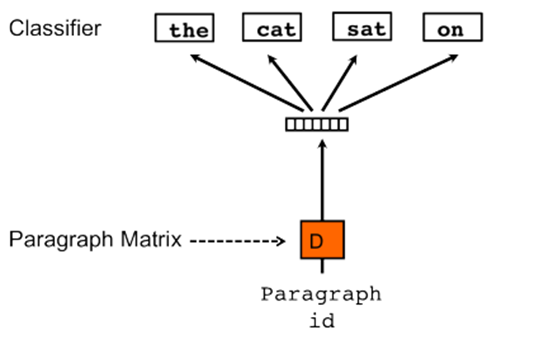

Training a Doc2Vec model is rather straight forward in Gensim, I have initialize the model and train for 30 epochs:

I have set the minimum word count to 2 in order to discard words with very few occurrences.

In [92]:
import multiprocessing

cores = multiprocessing.cpu_count()

Build a vocabulary

In [93]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 7188/7188 [00:00<00:00, 800654.82it/s]


In [94]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 7188/7188 [00:00<00:00, 1800564.81it/s]


Wall time: 14.4 s


### Buliding the final vector feature for the classifier.

In [95]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [96]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [97]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [98]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19246997728010387
Testing F1 score: 0.18457251699177393


#### Distributed Memory with Averaging

Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.

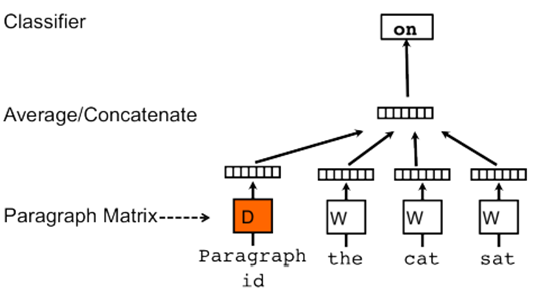


In [99]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|█████████████████████████████████████████████████████████████████████████| 7188/7188 [00:00<00:00, 2402474.87it/s]


In [100]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|█████████████████████████████████████████████████████████████████████████| 7188/7188 [00:00<00:00, 1202770.97it/s]


Wall time: 28.8 s


## Train Logistic Regression

In [101]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing accuracy 0.19928594612138917
Testing F1 score: 0.20053907475043736


In [102]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [103]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [104]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [105]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [106]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


## Decision Tree Classifier

In [107]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
y_predict = clf.predict(X_test)


In [110]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [113]:
y_predict = clf.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


## Support Vector Machine

In [115]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [116]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
y_predict = clf.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


## Naive Bayes Classifier 

In [119]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
y_predict = clf.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


## K - Nearest Neighbors

In [123]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)

In [124]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [125]:
y_predict = clf.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19149626744563453
Testing F1 score: 0.19290978627469182


#### After applying Doc2Vec, I got the low accuracy score  so I am going to apply Word2Vec to check if I get better accuracy

# Word2Vec

### Importing the libraries

In [127]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

### Creating feature vector - document term matrix

In [128]:
countV = CountVectorizer()
train_count = countV.fit_transform(df['narrative'].values)

In [129]:
print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3242)	1
  (0, 7680)	1
  (0, 583)	1
  (0, 11234)	1
  (0, 10974)	1
  (0, 10647)	1
  (0, 5076)	1
  (0, 8326)	1
  (0, 6593)	1
  (0, 1012)	1
  (0, 10926)	1
  (0, 9618)	1
  (1, 718)	1
  (1, 1932)	1
  (1, 4872)	1
  (1, 8504)	1
  (1, 5646)	1
  (1, 1499)	1
  (1, 11048)	1
  (1, 10918)	1
  (1, 7625)	1
  (1, 11077)	1
  (1, 4822)	1
  (1, 7371)	1
  (1, 10366)	2
  :	:
  (10268, 6811)	1
  (10268, 10532)	1
  (10268, 4010)	1
  (10268, 10859)	1
  (10268, 8942)	1
  (10268, 10598)	1
  (10268, 2514)	1
  (10268, 11558)	1
  (10268, 2533)	1
  (10268, 767)	1
  (10268, 11596)	2
  (10268, 12091)	1
  (10268, 3273)	1
  (10268, 10942)	1
  (10

In [130]:
# Vocab size
train_count.shape

# Check vocabulary using below command
print(countV.vocabulary_)

{'says': 9618, 'the': 10926, 'annies': 1012, 'list': 6593, 'political': 8326, 'group': 5076, 'supports': 10647, 'third': 10974, 'trimester': 11234, 'abortions': 583, 'on': 7680, 'demand': 3242, 'when': 11869, 'did': 3398, 'decline': 3149, 'of': 7623, 'coal': 2441, 'start': 10365, 'it': 6010, 'started': 10366, 'natural': 7371, 'gas': 4822, 'took': 11077, 'off': 7625, 'that': 10918, 'to': 11048, 'begin': 1499, 'in': 5646, 'president': 8504, 'george': 4872, 'bushs': 1932, 'administration': 718, 'hillary': 5360, 'clinton': 2410, 'agrees': 824, 'with': 11962, 'john': 6089, 'mccain': 6920, 'by': 1957, 'voting': 11684, 'give': 4916, 'bush': 1930, 'benefit': 1536, 'doubt': 3648, 'iran': 5957, 'health': 5270, 'care': 2064, 'reform': 9045, 'legislation': 6456, 'is': 5972, 'likely': 6559, 'mandate': 6792, 'free': 4697, 'se': 9722, 'change': 2224, 'surgeries': 10659, 'economic': 3838, 'turnaround': 11289, 'at': 1227, 'end': 4011, 'my': 7327, 'term': 10880, 'chicago': 2280, 'bears': 1473, 'have': 5

In [131]:
#create tf-idf frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

In [132]:
print(train_tfidf)

  (0, 11234)	0.40859171772724034
  (0, 10974)	0.27464754676534564
  (0, 10926)	0.0677989138791594
  (0, 10647)	0.2671209949482435
  (0, 9618)	0.11059590347781549
  (0, 8326)	0.2855659988967158
  (0, 7680)	0.13422816196352502
  (0, 6593)	0.32158683949346667
  (0, 5076)	0.29277656591667744
  (0, 3242)	0.3397158586447985
  (0, 1012)	0.4267207368785721
  (0, 583)	0.2885150893051596
  (1, 11869)	0.30084182401691434
  (1, 11077)	0.1846251902747174
  (1, 11048)	0.07293148656714478
  (1, 10926)	0.0535666676950447
  (1, 10918)	0.10039166299976086
  (1, 10366)	0.45918758897177264
  (1, 10365)	0.24391719716232654
  (1, 8504)	0.13828013980885745
  (1, 7625)	0.19431990720999015
  (1, 7623)	0.07063415878207531
  (1, 7371)	0.2540798130918345
  (1, 6010)	0.12965684397676613
  (1, 5646)	0.06818820507023976
  :	:
  (10268, 12091)	0.16007492699685666
  (10268, 12084)	0.25719257604200996
  (10268, 11596)	0.3687984803790839
  (10268, 11558)	0.23403424210687615
  (10268, 11048)	0.12327251772550725
  (10268,

In [133]:
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

#get feature names
print(countV.get_feature_names()[:25])


#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

{'says': 9618, 'the': 10926, 'annies': 1012, 'list': 6593, 'political': 8326, 'group': 5076, 'supports': 10647, 'third': 10974, 'trimester': 11234, 'abortions': 583, 'on': 7680, 'demand': 3242, 'when': 11869, 'did': 3398, 'decline': 3149, 'of': 7623, 'coal': 2441, 'start': 10365, 'it': 6010, 'started': 10366, 'natural': 7371, 'gas': 4822, 'took': 11077, 'off': 7625, 'that': 10918, 'to': 11048, 'begin': 1499, 'in': 5646, 'president': 8504, 'george': 4872, 'bushs': 1932, 'administration': 718, 'hillary': 5360, 'clinton': 2410, 'agrees': 824, 'with': 11962, 'john': 6089, 'mccain': 6920, 'by': 1957, 'voting': 11684, 'give': 4916, 'bush': 1930, 'benefit': 1536, 'doubt': 3648, 'iran': 5957, 'health': 5270, 'care': 2064, 'reform': 9045, 'legislation': 6456, 'is': 5972, 'likely': 6559, 'mandate': 6792, 'free': 4697, 'se': 9722, 'change': 2224, 'surgeries': 10659, 'economic': 3838, 'turnaround': 11289, 'at': 1227, 'end': 4011, 'my': 7327, 'term': 10880, 'chicago': 2280, 'bears': 1473, 'have': 5


['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04', '05', '050', '054th', '06', '07', '075', '08', '081', '09', '092', '095', '10', '100', '100th', '102']


In [134]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


    #create tf-df frequency features
    #tf-idf 
    tfidfV = TfidfTransformer()
    train_tfidf = tfidfV.fit_transform(train_count)

In [135]:
def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


    #bag of words - with n-grams
    #countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
    #tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

    tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [136]:
#POS Tagging
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = df['narrative']
 
print(training_sentences)

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
0        says the annies list political group supports ...
1        when did the decline of coal start? it started...
2        hillary clinton agrees with john mccain "by vo...
3        health care reform legislation is likely to ma...
4        the economic turnaround started at the end of ...
5        the chicago bears have had more starting quart...
6        jim dunnam has not lived in the district he re...
7        i'm the only person on this stage who has work...
8        however, it took $19.5 million in oregon lotte...
9        says gop primary opponents glenn grothman and ...
10       for the first time in history, the share of th...
11       since 2000, nearly 12 million americans have s...
12       when mitt romney was governor of massachusetts...
13       the economy bled $24 billion due to the govern...
14       most of

In [137]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
}

In [138]:
#helper function to strip tags from tagged corpus
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [139]:
#Using Word2Vec 
with open("C:/Users/salon/input data/glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
for line in lines}

In [140]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [141]:
train_tfidf.shape

(10269, 12129)

In [142]:
countV

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['narrative'].values)
print(vectorizer.get_feature_names())

['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04', '05', '050', '054th', '06', '07', '075', '08', '081', '09', '092', '095', '10', '100', '100th', '102', '103', '104', '105', '106', '107', '1070', '108', '109', '10th', '11', '110', '111th', '112', '112th', '113', '115', '116', '119', '11and', '11s', '11th', '12', '120', '123', '124', '125', '128', '12th', '13', '130', '131', '133', '134', '135', '136', '137', '13th', '14', '140', '1400', '141', '142', '143', '144', '145', '146', '14th', '15', '150', '153', '154', '155', '156', '157', '15th', '16', '160', '162nd', '163', '164', '165', '166', '168', '168k', '16s', '16th', '17', '170', '172', '175', '176', '177', '178', '1789', '179', '1790', '1791', '1792', '1798', '17th', '18', '180', '1800s', '181', '1835', '184', '1850', '186', '18th', '19', '190', '1900', '1900s', '1904', '1908', '191', '1912', '1913', '1915', '1916', '1917', '1919', '192', '1920s', '1928', '1929', '1930', '1930s', '1935', '1938', '194', '1940', '

In [144]:
from sklearn.feature_extraction.text import HashingVectorizer
# create the transform
vectorizer = HashingVectorizer(n_features=5)
# encode document
vector = vectorizer.transform(df['narrative'].values)
# summarize encoded vector
print(vector.shape)

# Feature Credibility %25 truth vector
print(vector.toarray() *  0.25)

(10269, 5)
[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]]


## Classification

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

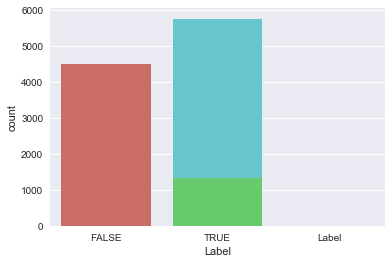

In [145]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [146]:
#string to test
doc_new = ['obama is running for president in 2022']

In [147]:
df = pd.read_csv('C:/Users/salon/input data/complex/train_l.csv')
train_news = df[['Statement','Label']]

df1 = pd.read_csv('C:/Users/salon/input data/complex/test_l.csv')
test_news = df1[['Statement','Label']]

## Naive bayes 

In [148]:
#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

## Logistic Regression

In [149]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])

C:\ML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5985887887103096

## Support Vector Machine

In [150]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

C:\ML\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5723245785966288

## Stochastic Gradient Descent

In [151]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',FeatureSelection.countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])

C:\ML\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6068208545668365

## Random Forest

In [152]:
#random forest
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

0.6279890239121912

#### After applying Word2Vec, I got the better accuracy score among which Random Forest is the highest with 62%

### References
- https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html
- http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

## Non-complex Feature - Fact Checks

Fake Or Real? How To Self-Check The News And Get The Facts

- Pay attention to the domain and URL
- Read the "About Us" section
- Look at the quotes in a story
- Look at who said them
- Check the comments
- Reverse image search

# Partisan News Analysis — January 1, 2015 to March 31, 2017

This repository contains data and findings related to the BuzzFeed News article, "Inside The Partisan Fight For Your News Feed," published August 8, 2017. This article contains important context and details.

## Data

### Raw data

The raw, input data for BuzzFeed News’ core analyses come from four sources:

BuzzFeed News’ list of partisan sites and associated Facebook Pages

The input input data/all-partisan-sites.csv file represents the list of all 667 websites identified by BuzzFeed News as partisan news outlets, according to the methodology at the bottom of the main article. The data includes each site’s political category (“right” or “left”) and whether BuzzFeed News identified it as being run from Macedonia. The file also includes the Facebook ID numbers for the Facebook Pages, if any, associated with each website at the time of research. In cases where a website is associated with multiple Facebook Pages, there will be multiple rows representing the site.

Facebook IDs are listed in the “unavailable_id” column if the Facebook API would not provide data for that ID at the time it was requested on July 21, 2017. Some are "personal pages", which are akin to public-facing Facebook profiles but not accessible via Facebook's API unless the creator of that page allows it. Another group includes pages that Facebook shut down before we requested their data. Finally, some pages — 24 conservative and 6 liberal, as of July 31 — were unavailable via Facebook's API at the time of our data collection but have since become available or were accessible by checking Facebook manually. None of those 30 pages would have been among the 20 most-popular pages (by fan count) for their respective political categories.

### Overall Facebook page data

The input data/pages-info.csv file represents a list of all 452 Facebook pages affiliated with the websites identified by BuzzFeed News including title, description, fan count, the page ID, and other information extracted from Facebook’s API.

### Facebook posts

For each Facebook page, we used Facebook’s API to collect all posts published between January 1, 2015 and March 31, 2017. The data included engagement metrics, such as shares, comments, and reactions (likes, loves, hahas, sads etc.). That data is too large to fit in this repository. It can be found here. Note: This data was collected on July 21, 2017. It is possible that some pages deleted posts between when they were published and when the data were collected.

### Domain registration data

The data/domaintools-whois-results.csv includes the WHOIS registration data, downloaded from DomainTools, for each unique domain — excluding blogging platforms — represented in BuzzFeed News’ list of partisan news outlets.

### Output data

The analytic code in this repository produces the following data, which are used throughout the article:

### Facebook pages — overview

This file provides an overview of all the Facebook Pages in BuzzFeed News’ list, with each page’s title, fan count, page ID, and political affiliation:

- output data/fb-page-info-summary.csv

The code that produces this output can be found in summarize-fb-page-info.

### Facebook pages — per-page engagement metrics

For each page’s posts during each week and month, we calculated the total engagement metrics (shares, comments, and reactions) and number of posts. The resulting files:

- output data/page-engagement-by-week.csv
- output data/fox-vs-occupy-engagement-by-week.csv (the weekly total engagement for the Fox News and Occupy Democrats pages)
- output data/page-engagement-by-month.csv

The code that produces these outputs can be found in aggregate-metrics.

### Facebook pages — aggregate engagement metrics 

Additionally, we aggregated the engagement metrics for the 100 most-engaged posts on the right and on the left each week:

- output data/top-100-posts-total-engagement-by-week-and-partisanship.csv

The code that produces these outputs can also be found in aggregate-metrics.

### Top Facebook posts

Using the data collected from the Facebook API, we identified the top 50 posts (by total engagement) published during the entire timeframe, both overall and by type of post (event, link, music, note, offer, photo, status, video):

- output data/top-50-posts-all.csv
- output data/top-50-posts-event.csv
- output data/top-50-posts-link.csv
- output data/top-50-posts-music.csv
- output data/top-50-posts-note.csv
- output data/top-50-posts-offer.csv
- output data/top-50-posts-photo.csv
- output data/top-50-posts-status.csv
- output data/top-50-posts-video.csv

The code that produces these output can also be found in aggregate-metrics.

### Facebook pages — per-page engagement growth

Using the monthly total and median engagement data, we calculated the growth (or decline) in each metric, for each page between March 2016 and March 2017.

- output data/page-engagement-growth.csv (growth in total engagements for each Facebook page, its title and its political affiliation)
- output data/page-engagement-growth-top-20-pages-left.csv (growth in total engagements  for the top 20 left-leaning Facebook pages, as measured by fan count)
- output data/page-engagement-growth-top-20-pages-right.csv (growth in total engagements for the top 20 right-leaning Facebook pages)

The code that produces these outputs can be found in calculate-page-growth.

### Domain registration dates

We used the WHOIS data from DomainTools to calculate the annual and monthly number of registrations for sites in our list, by partisanship:

- output data/unique-domains.txt (the list of domain names submitted to DomainTools)
- output data/whois-registration-dates.csv
- output data/whois-registration-counts-annual.csv
- output data/whois-registration-counts-monthly.csv

The code that produces these outputs analyze-whois-registration-dates.

### Dataset

- BuzzFeed News’ list of partisan sites and associated Facebook Pages - https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages/tree/master/data

### Code Reference

- Link - https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages/tree/master/notebooks

## Summarize general info for Facebook pages

The below code combines the pages-info.csv and all-partisan-sites.csv files to produce a file with four attributes for each Facebook page:

- page_id
- political_category
- page_name
- fan_count

In [153]:
# Importing the libraries
import pandas as pd

In [154]:
page_info = pd.read_csv("C:/Users/salon/input data/noncomplex/pages-info.csv", dtype={"page_id": str})\
    [[ "page_id", "page_name", "fan_count" ]]
page_info.head()

,page_id,page_name,fan_count
0,108038612554992,Americans Against the Tea Party,583256
1,153418591515382,act.tv,285075
2,188464111175168,New Blue United,1476093
3,296856040436954,Obama is the Worst President in US History,1569590
4,492836854251934,RedFlag NewsDesk,1533


In [155]:
from sklearn.feature_extraction.text import HashingVectorizer
# create the transform
vectorizer = HashingVectorizer(n_features=5)
# encode document
vector = vectorizer.transform(page_info['page_name'].values)
# summarize encoded vector
print(vector.shape)

# Feature Credibility %25 truth vector
print(vector.toarray() *  0.10)

(452, 5)
[[ 0.05773503  0.05773503  0.         -0.05773503  0.        ]
 [ 0.          0.07071068  0.          0.          0.07071068]
 [ 0.          0.          0.          0.1         0.        ]
 ...
 [ 0.          0.07071068  0.         -0.07071068  0.        ]
 [ 0.         -0.05773503  0.05773503  0.          0.05773503]
 [ 0.         -0.05773503  0.05773503 -0.05773503  0.        ]]


In [156]:
sites = pd.read_csv(
    'C:/Users/salon/input data/noncomplex/all-partisan-sites.csv',
    dtype={ "fb_id": str },
    na_values=["None"]
).rename(columns={"fb_id": "page_id"})

sites[[ "site", "political_category", "page_id",  ]].head()

,site,political_category,page_id
0,100percentfedup.com,right,311190048935167
1,21stcenturywire.com,left,182032255155419
2,24dailynew.com,right,515629708825640
3,24usnews.com,right,1430973860248840
4,4threvolutionarywar.wordpress.com,left,NaN


Make sure that each page has been assigned only one political category:

In [157]:
assert (sites[
    ~sites["page_id"].isin([ "unavailable", "personal_page" ])
].groupby("page_id")["political_category"].nunique() > 1).sum() == 0

In [158]:
partisanship = sites.groupby("page_id")\
    ["political_category"].first()\
    .reset_index()

partisanship.head()

,page_id,political_category
0,100434040001314,left
1,1014803551921469,right
2,1019871961378419,right
3,1035617169863710,right
4,1036253643101134,left


## Performing Data Enrichment on page_info and partisanship

In [159]:
summary = pd.merge(
    page_info,
    partisanship,
    how="left"
)
summary.head()

,page_id,page_name,fan_count,political_category
0,108038612554992,Americans Against the Tea Party,583256,left
1,153418591515382,act.tv,285075,left
2,188464111175168,New Blue United,1476093,left
3,296856040436954,Obama is the Worst President in US History,1569590,right
4,492836854251934,RedFlag NewsDesk,1533,right


In [160]:
summary["political_category"].value_counts()

right    310
left     142
Name: political_category, dtype: int64

In [161]:
# Generated the output file
summary.sort_values("page_id")\
    [["page_id", "political_category", "page_name", "fan_count" ]]\
    .to_csv("C:/Users/salon/output data/fb-page-info-summary.csv", index=False)

## Calculate aggregate engagement metrics and get top posts

The below code loads the raw data produced by Facebook's API, and then calculates the following:

- Each page's number of posts and total engagement for each week and month between 2015-01-01 and 2017-03-31, and for several specific time periods
- The total engagement for the 100 most popular posts on the left and right each week
- The top 50 posts overall, and by post type (photo, video, etc.)

In [162]:
# Importing the libraries
import pandas as pd
from datetime import datetime, timedelta
from glob import glob

In [163]:
status_paths = glob("C:/Users/salon/input data/statuses/*.csv")
len(status_paths)

452

In [164]:
def parse_status_csv(path):
    return pd.read_csv(
        path,
        parse_dates=['status_published'],
        date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),
    ).assign(page_id=lambda x: x["status_id"].str.split("_").str[0])

In [165]:
_statuses = pd.concat([ parse_status_csv(path) for path in status_paths ])\
    .drop_duplicates(subset=["status_id"])

In [166]:
len(_statuses)

4022667

### Select only statuses posted between 2015-01-01 and 2017-03-31, and remove cover photos

(Changes to a page's cover photo are counted as posts in Facebook's API data.)

In [167]:
cover_photos = _statuses[
    (_statuses["status_type"] == "photo") &
    _statuses["status_link"].str.contains(r"^https://www.facebook.com") &
    _statuses["link_name"].str.contains(r" cover photo$")
]
len(cover_photos)

1917

In [168]:
cover_photos["link_name"].value_counts().head()

The Republican Coffee Corner with Angela's cover photo    411
Truthdig's cover photo                                    277
Real Progressives's cover photo                           100
Being Liberal's cover photo                                45
WND's cover photo                                          38
Name: link_name, dtype: int64

In [169]:
to_date = lambda x: datetime.strptime(x, "%Y-%m-%d").date()

In [170]:
statuses = _statuses[
    ~_statuses["status_id"].isin(set(cover_photos["status_id"])) &
    (_statuses["status_published"].dt.date >= to_date("2015-01-01")) &
    (_statuses["status_published"].dt.date < to_date("2017-04-01"))
]

len(statuses)

4020255

### Add partisanship categorizations

In [171]:
page_info = pd.read_csv(
    'C:/Users/salon/output data/fb-page-info-summary.csv',
    dtype={ "page_id": str },
)

In [172]:
statuses = pd.merge(
    page_info[[ "page_id", "page_name", "political_category" ]],
    statuses,
    on="page_id",
    how="left"
)

In [173]:
# Should be same number as before.
len(statuses)

4020255

### Pages with missing political_category

(There should be none.)

In [174]:
print("\n".join(statuses[
    statuses["political_category"].isnull()
]["page_id"].unique()))

### Calculate  total_engagement for each post

In [175]:
METRIC_COLUMNS = [ c for c in statuses.columns if "num_" in c ]

In [176]:
statuses[METRIC_COLUMNS] = statuses[METRIC_COLUMNS].astype(int)

In [177]:
statuses["total_engagement"] = statuses[[ "num_reactions", "num_comments", "num_shares" ]].sum(axis=1)

### Calculate metrics by week and month

In [178]:
def aggregate(statuses, groups, metric_fn=sum):
    grp = statuses.groupby(groups)
    df = grp[["total_engagement"] + METRIC_COLUMNS ].agg(metric_fn)
    df["post_count"] = grp.size()
    return df

In [179]:
def aggregate_pages_by_time(statuses, frequency, metric_fn=sum):
    time_grouper = pd.Grouper(
        key="status_published",
        freq=frequency,
        closed="left",
        label="left"
    )
    return aggregate(statuses, [ "page_id", time_grouper ], metric_fn)

### Weekly

In [180]:
weekly_totals = aggregate_pages_by_time(statuses, "W-SUN").astype(int)
weekly_totals.head()

total_engagement  num_reactions  \
page_id         status_published                                    
100434040001314 2014-12-28                    2507           1733   
                2015-01-04                    8534           6149   
                2015-01-11                    9975           6978   
                2015-01-18                   11411           8491   
                2015-01-25                    8772           6242   

                                  num_comments  num_shares  num_likes  \
page_id         status_published                                        
100434040001314 2014-12-28                 255         519       1733   
                2015-01-04                 788        1597       6149   
                2015-01-11                 839        2158       6978   
                2015-01-18                 920        2000       8491   
                2015-01-25                 863        1667       6242   

                                  num_loves  num_wows  num_hahas  num_sads  \
page_id         status_published                                             
100434040001314 2014-12-28                0         0          0         0   
                2015-01-04                0         0          0         0   
                2015-01-11                0         0          0         0   
                2015-01-18                0         0          0         0   
                2015-01-25                0         0          0         0   

                                  num_angrys  post_count  
page_id         status_published                          
100434040001314 2014-12-28                 0          20  
                2015-01-04                 0          74  
                2015-01-11                 0          78  
                2015-01-18                 0          77  
                2015-01-25                 0          72

In [181]:
weekly_totals.to_csv("C:/Users/salon/output data/page-engagement-by-week.csv")

#### Just for Fox News and Occupy Democrats

In [182]:
fox_and_occupy_ids = page_info[
    page_info["page_name"].isin([ "Fox News", "Occupy Democrats" ])
].set_index("page_id")["page_name"].to_dict()
fox_and_occupy_ids

{'15704546335': 'Fox News', '346937065399354': 'Occupy Democrats'}

In [183]:
fox_vs_occupy_weekly_engagement = weekly_totals.loc[list(fox_and_occupy_ids.keys())]\
    ["total_engagement"].unstack(level=0)\
    .rename(columns=fox_and_occupy_ids).astype(int)

fox_vs_occupy_weekly_engagement.head()

page_id,Fox News,Occupy Democrats
status_published,,
2014-12-28,1166366,962809
2015-01-04,3486540,357919
2015-01-11,4479245,875899
2015-01-18,3888642,1042961
2015-01-25,2287591,488994


In [184]:
fox_vs_occupy_weekly_engagement.to_csv("C:/Users/salon/output data/fox-vs-occupy-engagement-by-week.csv")

### Monthly

In [185]:
monthly_totals = aggregate_pages_by_time(statuses, "MS").astype(int)
monthly_totals.head()

total_engagement  num_reactions  \
page_id         status_published                                    
100434040001314 2015-01-01                   41199          29593   
                2015-02-01                   42369          30672   
                2015-03-01                   57146          41921   
                2015-04-01                   67353          50715   
                2015-05-01                   69072          49787   

                                  num_comments  num_shares  num_likes  \
page_id         status_published                                        
100434040001314 2015-01-01                3665        7941      29593   
                2015-02-01                3873        7824      30672   
                2015-03-01                4773       10452      41921   
                2015-04-01                5116       11522      50715   
                2015-05-01                5682       13603      49787   

                                  num_loves  num_wows  num_hahas  num_sads  \
page_id         status_published                                             
100434040001314 2015-01-01                0         0          0         0   
                2015-02-01                0         0          0         0   
                2015-03-01                0         0          0         0   
                2015-04-01                0         0          0         0   
                2015-05-01                0         0          0         0   

                                  num_angrys  post_count  
page_id         status_published                          
100434040001314 2015-01-01                 0         321  
                2015-02-01                 0         346  
                2015-03-01                 0         388  
                2015-04-01                 0         455  
                2015-05-01                 0         441

In [186]:
monthly_totals.to_csv("C:/Users/salon/output data/page-engagement-by-month.csv")

### Get top 100 posts by week and partisanship

In [187]:
def get_top_100_posts_total_engagement(df):
    top = df.nlargest(100, "total_engagement")
    page_counts = top["page_id"].value_counts()
    total_engagement = top["total_engagement"].sum()
    return pd.Series({
        "num_posts": len(top),
        "total_engagement": total_engagement,
        "max_engagement": top["total_engagement"].max(),
        "min_engagement": top["total_engagement"].min(),
        "distinct_pages": len(page_counts),
        "top_page_count": page_counts.iloc[0],
        "top_page_prop_engagement": top.groupby("page_id")["total_engagement"].sum().max()\
            / total_engagement,
    })

In [188]:
weekly_top_posts_by_partisanship = statuses.groupby([
    pd.Grouper(
        key="status_published",
        freq="W-SUN",
        closed="left",
        label="left"
    ),
    "political_category",
]).apply(get_top_100_posts_total_engagement).unstack()

weekly_top_posts_by_partisanship.head()

num_posts        total_engagement              \
political_category      left  right             left       right   
status_published                                                   
2014-12-28             100.0  100.0        2735721.0   6669197.0   
2015-01-04             100.0  100.0        3073663.0  10325893.0   
2015-01-11             100.0  100.0        4198339.0  14309438.0   
2015-01-18             100.0  100.0        4220414.0  14749326.0   
2015-01-25             100.0  100.0        2950189.0   9383113.0   

                   max_engagement            min_engagement           \
political_category           left      right           left    right   
status_published                                                       
2014-12-28               655862.0  1608308.0         8365.0  21088.0   
2015-01-04               219835.0   598736.0        15625.0  42047.0   
2015-01-11               359320.0  1828325.0        15091.0  48988.0   
2015-01-18               581405.0  1744063.0        17212.0  46629.0   
2015-01-25               172044.0  1749288.0        14531.0  38044.0   

                   distinct_pages       top_page_count        \
political_category           left right           left right   
status_published                                               
2014-12-28                   21.0  22.0           16.0  22.0   
2015-01-04                   23.0  21.0           15.0  24.0   
2015-01-11                   20.0  19.0           21.0  27.0   
2015-01-18                   21.0  21.0           15.0  29.0   
2015-01-25                   17.0  20.0           19.0  25.0   

                   top_page_prop_engagement            
political_category                     left     right  
status_published                                       
2014-12-28                         0.337049  0.249237  
2015-01-04                         0.221724  0.274383  
2015-01-11                         0.221967  0.293881  
2015-01-18                         0.201163  0.441159  
2015-01-25                         0.280049  0.225935

In [189]:
weekly_top_posts_by_partisanship[[
    "distinct_pages",
    "top_page_count",
    "top_page_prop_engagement",
    "min_engagement"
]].describe()

distinct_pages             top_page_count              \
political_category           left       right           left       right   
count                  118.000000  118.000000     118.000000  118.000000   
mean                    14.983051   23.686441      40.279661   26.906780   
std                      3.343531    4.962594      11.742163    6.292021   
min                      9.000000   12.000000      15.000000   16.000000   
25%                     12.000000   20.000000      33.250000   22.000000   
50%                     15.000000   24.000000      41.500000   26.000000   
75%                     17.000000   27.000000      47.750000   30.750000   
max                     23.000000   34.000000      64.000000   46.000000   

                   top_page_prop_engagement             min_engagement  \
political_category                     left       right           left   
count                            118.000000  118.000000     118.000000   
mean                               0.398698    0.284040   38809.177966   
std                                0.103203    0.077730   19829.731583   
min                                0.201163    0.156508    8365.000000   
25%                                0.319790    0.225949   23556.250000   
50%                                0.400200    0.271161   38478.000000   
75%                                0.468442    0.336963   48094.500000   
max                                0.687477    0.481636  101720.000000   

                                   
political_category          right  
count                  118.000000  
mean                 57408.440678  
std                  16763.954391  
min                  21088.000000  
25%                  46300.500000  
50%                  53257.500000  
75%                  63175.500000  
max                 145990.000000

In [190]:
# Make sure that we have at least 100 posts per week for both left/right
assert (weekly_top_posts_by_partisanship["num_posts"] < 100).sum().sum() == 0

In [191]:
weekly_top_posts_by_partisanship["total_engagement"]\
    .astype(int)\
    .to_csv("C:/Users/salon/output data/top-100-posts-total-engagement-by-week-and-partisanship.csv")

### Get top 50 posts, overall, by post type

In [192]:
def get_top(df, num):
    return df.sort_values([
        "total_engagement",
        "status_id"
    ], ascending=False).head(num)

In [193]:
for status_type, group in statuses.groupby([ "status_type" ]):
    print(status_type)
    get_top(group, 50).to_csv(
        "C:/Users/salon/output data/top-50-posts-{}.csv".format(status_type),
        index=False
    )

event
link
music
note
offer
photo
status
video


### ... and among all posts

In [194]:
get_top(statuses, 50).to_csv("C:/Users/salon/output data/top-50-posts-all.csv", index=False)

## Calculate page growth, per engagement

The below code calculates each pages' growth, in terms of changes in monthly engagement between March 2016 and March 2017.

In [195]:
import pandas as pd
import datetime

### Load the aggregated data

In [196]:
monthly_engagement = pd.read_csv("C:/Users/salon/output data/page-engagement-by-month.csv", dtype={"page_id": str})

### Merge the two comparison months

In [197]:
comparison = pd.merge(
    monthly_engagement[
        monthly_engagement["status_published"] == "2016-03-01"
    ][[ "page_id", "total_engagement" ]],
    monthly_engagement[
        monthly_engagement["status_published"] == "2017-03-01"
    ][[ "page_id", "total_engagement" ]],
    on="page_id",
    how="outer",
    suffixes=[ ".march2016", ".march2017" ]
)
comparison.head()

,page_id,total_engagement.march2016,total_engagement.march2017
0,100434040001314,52080.0,55029.0
1,1019871961378419,519875.0,1950091.0
2,103971336305218,96008.0,126475.0
3,104037195986,3905.0,3673.0
4,10498053716,419447.0,601169.0


### Add political category and page name information

In [198]:
page_info = pd.read_csv(
    "C:/Users/salon/output data/fb-page-info-summary.csv",
    dtype={"page_id": str}
)
page_info.head()

,page_id,political_category,page_name,fan_count
0,100434040001314,left,Wonkette,96322
1,1014803551921469,right,SourcesNews,59306
2,1019871961378419,right,Rare America,2982929
3,1035617169863710,right,I DID NOT Vote For Hillary in 2016,36269
4,1036253643101134,left,Proud Liberal,510991


In [199]:
def categorize_growth(page):
    diff = page["total_engagement.march2017"] - page["total_engagement.march2016"]
    if diff > 0:
        return "grown_{political_category}".format(**page)
    elif diff == 0:
        return "flat_{political_category}".format(**page)
    else:
        return "shrunken_{political_category}".format(**page)

In [200]:
comparison_with_fb_info = pd.merge(
    comparison,
    page_info,
    on="page_id",
    how="left"
).assign(growth_category=lambda x: x.fillna(0).apply(categorize_growth, axis=1))
comparison_with_fb_info.head()

,page_id,total_engagement.march2016,total_engagement.march2017,political_category,page_name,fan_count,growth_category
0,100434040001314,52080.0,55029.0,left,Wonkette,96322,grown_left
1,1019871961378419,519875.0,1950091.0,right,Rare America,2982929,grown_right
2,103971336305218,96008.0,126475.0,right,Hot Air,820318,grown_right
3,104037195986,3905.0,3673.0,left,Black Agenda Report,23332,shrunken_left
4,10498053716,419447.0,601169.0,right,Media Research Center,1728105,grown_right


In [201]:
# Make sure we have partisanship categorizations for each page
assert comparison_with_fb_info["political_category"].isnull().sum() == 0

In [202]:
comparison_with_fb_info.to_csv("C:/Users/salon/output data/page-engagement-growth.csv", index=False)

### Pare down growth to top 20 pages on left and right for graphics

The below part of the notebook takes the top 20 pages on the left and right and pares down the growth spreadsheet to those top 20.

In [203]:
top_20s = comparison_with_fb_info.groupby("political_category")\
    .apply(lambda x: x.nlargest(20, "fan_count"))
top_20s

page_id  total_engagement.march2016  \
political_category                                                     
left               212   341163402640457                  22751278.0   
                   218   354522044588660                   8231964.0   
                   215   346937065399354                  26394599.0   
                   19    114517875225866                  12244729.0   
                   95    160389977329803                   4421326.0   
                   357  1340186812659728                         NaN   
                   328   979613892126968                   1470734.0   
                   175       24674986856                    258183.0   
                   428   610045389164725                         NaN   
                   184   273864989376427                   2292659.0   
                   150      210277954204                   2136335.0   
                   138   200137333331078                   1288136.0   
                   122      177486166274                   5160854.0   
                   378  1672814509645693                         NaN   
                   299        7642602143                    784004.0   
                   104  1640832309490921                   3145538.0   
                   391   188464111175168                         NaN   
                   40    129370207168068                   1035011.0   
                   50    139398939438430                    533627.0   
                   64    146422995398181                   3844800.0   
right              87        15704546335                  27600038.0   
                   17    114364638621903                   2856203.0   
                   128   184859785026060                   6216784.0   
                   124   179035672287016                  16394130.0   
                   31       123624513983                   3232290.0   
                   126      182919686769                   3200779.0   
                   136  1969250316633715                   3178355.0   
                   277       58158120046                   1900579.0   
                   262   519305544814653                   2512689.0   
                   42    133961323610549                   8284190.0   
                   229   389658314427637                   7038986.0   
                   362   145380305523723                         NaN   
                   323       95475020353                   9066729.0   
                   141   201956993160690                   1126835.0   
                   290       69813760388                   2306415.0   
                   426   592074077639509                         NaN   
                   15    112723252096438                   8294477.0   
                   1    1019871961378419                    519875.0   
                   112   169204449790211                   1917771.0   
                   282        6333396177                    931395.0   

                        total_engagement.march2017 political_category  \
political_category                                                      
left               212                  18783790.0               left   
                   218                   5459343.0               left   
                   215                  36673027.0               left   
                   19                   19753039.0               left   
                   95                    5793239.0               left   
                   357                  10240180.0               left   
                   328                   5961902.0               left   
                   175                    282455.0               left   
                   428                   2371347.0               left   
                   184                   2075205.0               left   
                   150                   2322745.0               left   
                   138                   1288656.0         

In [204]:
top_20s.loc["left"].to_csv("C:/Users/salon/output data/page-engagement-growth-top-20-pages-left.csv", index=False)
top_20s.loc["right"].to_csv("C:/Users/salon/output data/page-engagement-growth-top-20-pages-right.csv", index=False)

## Analysis of sites' WHOIS registration dates

The below part of the notebook below collects and analyzes the registration dates of the website domains for this project's list of sites.

The first section standardizes the site URLs to generate a list of unique domains, excluding domains belonging to blogging platforms.

The second section aggregates the WHOIS data for those domains by year, month, and political affiliation.

In [205]:
import pandas as pd
import re

### Creating the list of domains

### Loading the sites and converting URLs to domains

In [206]:
def site_to_domain(site):
    if pd.isnull(site): return None
    if re.match(r"^http", site):
        site = re.search("https?://([^/]+)", site).group(1)
    site = re.sub(r"/.*$", "", site)
    return ".".join(site.split(".")[-2:]).lower()

In [207]:
all_sites = pd.read_csv("C:/Users/salon/input data/noncomplex/all-partisan-sites.csv")
all_sites["site"] = all_sites["site"].str.strip().str.lower()
all_sites["domain"] = all_sites["site"].apply(site_to_domain)
all_domains = all_sites["domain"].dropna().unique()
len(all_domains)

665

### Ignoring three domains from the list that belong to blogging platforms

In [208]:
DOMAINS_TO_IGNORE = [
    "blogspot.com",
    "blogspot.ca",
    "wordpress.com",
]

In [209]:
all_sites[
    all_sites["domain"].isin(DOMAINS_TO_IGNORE)
][[ "site", "domain", "political_category" ]]

,site,domain,political_category
4,4threvolutionarywar.wordpress.com,wordpress.com,left
144,counterinformation.wordpress.com,wordpress.com,left
362,newzeal.blogspot.com,blogspot.com,right
492,sharpelbowsstl.blogspot.ca,blogspot.ca,right
534,theimmoralminority.blogspot.ca,blogspot.ca,left


### Generating a list of unique domains

In [210]:
unique_domains = list(sorted(set(all_domains) - set(DOMAINS_TO_IGNORE)))
unique_domains[:5]

['100percentfedup.com',
 '21stcenturywire.com',
 '24dailynew.com',
 '24usnews.com',
 '63red.com']

In [211]:
with open("C:/Users/salon/output data/unique-domains.txt", "w") as f:
    f.write("\n".join(unique_domains))

### Fetching WHOIS data for the domains

The domains above were then submitted to DomainTools' Bulk Parsed Whois service, which produced the file at data/domaintools-whois-results.csv.

### Analyzing the domain registration dates

The main columns of interest in the WHOIS data are the domain and the WHOIS registration date:

In [212]:
whois = pd.read_csv("C:/Users/salon/input data/noncomplex/domaintools-whois-results.csv", parse_dates=[ "create date" ])\
    .rename(columns={
        "create date": "date_registered"
    })
whois.head()[[ "domain", "date_registered" ]]

,domain,date_registered
0,100percentfedup.com,2012-03-13
1,21stcenturywire.com,2009-11-03
2,24dailynew.com,2017-02-21
3,24usnews.com,2016-07-03
4,63red.com,2011-12-05


### Merging the WHOIS data with the manually-collected political affiliations

In [213]:
registration_dates = pd.merge(
    all_sites[[ "site", "domain", "political_category" ]],
    whois[[ "domain", "date_registered" ]],
    on="domain",
    how="left"
).drop_duplicates(subset=["site"])\
    .sort_values([ "date_registered", "site" ])

registration_dates["year_registered"] = registration_dates["date_registered"].dt.strftime("%Y")
registration_dates["month_registered"] = registration_dates["date_registered"].dt.strftime("%Y-%m")
registration_dates["date_registered"] = registration_dates["date_registered"].dt.strftime("%Y-%m-%d")

registration_dates = registration_dates.replace("NaT", pd.np.nan)

registration_dates.head()

,site,domain,political_category,date_registered,year_registered,month_registered
17,aim.org,aim.org,right,1994-11-18,1994,1994-11
25,alternet.org,alternet.org,left,1994-12-07,1994,1994-12
210,fair.org,fair.org,left,1994-12-08,1994,1994-12
537,thenation.com,thenation.com,left,1995-02-23,1995,1995-02
576,townhall.com,townhall.com,right,1995-03-02,1995,1995-03


In [214]:
registration_dates.to_csv("C:/Users/salon/output data/whois-registration-dates.csv", index=False)

### Checking for sites for which we don't have WHOIS registration dates

Good sign: They are only those for which we have, above, explictly excluded the domains.

In [215]:
registration_dates[
    registration_dates["date_registered"].isnull()
]

,site,domain,political_category,date_registered,year_registered,month_registered
4,4threvolutionarywar.wordpress.com,wordpress.com,left,NaN,NaN,NaN
144,counterinformation.wordpress.com,wordpress.com,left,NaN,NaN,NaN
362,newzeal.blogspot.com,blogspot.com,right,NaN,NaN,NaN
492,sharpelbowsstl.blogspot.ca,blogspot.ca,right,NaN,NaN,NaN
534,theimmoralminority.blogspot.ca,blogspot.ca,left,NaN,NaN,NaN


### Aggregating registration dates by year, month, and political affiliation

In [216]:
annual_registrations = registration_dates\
    .dropna(subset=["date_registered"])\
    .groupby([ "year_registered", "political_category" ])\
    .size()\
    .unstack().fillna(0).astype(int)\
    .assign(total=lambda x: x.sum(axis=1))

annual_registrations.to_csv("C:/Users/salon/output data/whois-registration-counts-annual.csv")
annual_registrations.head()

political_category,left,right,total
year_registered,,,
1994,2,1,3
1995,7,10,17
1996,2,5,7
1997,3,5,8
1998,5,10,15


In [217]:
monthly_registrations = registration_dates\
    .dropna(subset=["date_registered"])\
    .groupby([ "month_registered", "political_category" ])\
    .size()\
    .unstack().fillna(0).astype(int)\
    .assign(total=lambda x: x.sum(axis=1))
    
monthly_registrations.to_csv("C:/Users/salon/output data/whois-registration-counts-monthly.csv")
monthly_registrations.head()

political_category,left,right,total
month_registered,,,
1994-11,0,1,1
1994-12,2,0,2
1995-02,1,0,1
1995-03,0,1,1
1995-04,1,1,2


## Polynomial Equation

### Our %vector for polynomial equation are as below


#### Anu Sebastian
- x1: Political Affiliation - Complex Feature
- x2: Social Media          - Non-complex Feature

#### Ravali Nagabandi    
- x3:Bias                   - Complex Feature
- x4:Hate News             - Non-complex Feature
        
#### Saloni Sharad Bhalearo 
- x5:Credibilty             - Complex Feature
- x6:Fact Checks            - Non-complex Feature

The polynomial equation is

= a1 * x1 + a2 * x2 + a3 * x3 + a4 * x4 + a5 * x5 + a6 * x6

= 0.26 * x1 + 0.07 * x2 + 0.25 * x3 + 0.08 * x4 + 0.24 * x5 + 0.10 * x6

= [[-0.09192388 -0.09192388  0.09192388 -0.18384776 -0.09192388]
 [-0.21633308  0.07211103  0.07211103 -0.07211103  0.07211103]
 [-0.05964809  0.11929618 -0.11929618 -0.17894427 -0.05964809]
 ...
 [-0.07211103  0.14422205 -0.14422205 -0.14422205  0.        ]
 [-0.06128259  0.         -0.12256518 -0.18384776  0.12256518]
 [-0.12172279  0.18258419 -0.0304307   0.0608614  -0.12172279]] +
         
[[ 0.01560379  0.05851421  0.01170284  0.02340568  0.02340568]
 [-0.06413231  0.02494034 -0.00712581  0.          0.01068872]
 [-0.03454313  0.04251462  0.02657164  0.03454313  0.        ]
 ...
 [-0.01979487  0.05855981  0.01979487  0.01072222 -0.0239188 ]
 [-0.01800206  0.06480741  0.01080123  0.01440165 -0.00720082]
 [-0.0224777   0.06570405  0.00691622  0.00172905 -0.00518716]] +

[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]] +
         
[[-0.016       0.032       0.         -0.064      -0.032     ]
 [-0.06672461 -0.01668115  0.01668115  0.01668115  0.03336231]
 [ 0.03124534  0.04166045  0.04166045  0.03124534  0.03124534]
 ...
 [ 0.         -0.04618802 -0.04618802  0.          0.04618802]
 [-0.02309401  0.         -0.02309401  0.06928203 -0.02309401]
 [ 0.03236159  0.04314879  0.0215744   0.05393599 -0.0107872 ]] +
         

[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]] +
         
[[ 0.         -0.1         0.          0.          0.        ]
 [ 0.          0.1         0.          0.          0.        ]
 [ 0.         -0.1         0.          0.          0.        ]
 ...
 [ 0.          0.07071068  0.         -0.07071068  0.        ]
 [ 0.         -0.05773503  0.05773503  0.          0.05773503]
 [ 0.         -0.05773503  0.05773503 -0.05773503  0.        ]]

### References
- https://guides.ucf.edu/fakenews/factcheck